<a href="https://colab.research.google.com/github/EMcoding17/ExtraccionConocimientosDeBD/blob/main/Actividad06/RedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RED NERURONAL**
## **Extraccion de conocimientos de base de datos**
## **Romero Sosa Emma Yuridia**
## **IDGS 91**

---



# **Importar librerias**

In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# **Cargar Dataset**

In [48]:
#Cargar dataset desde github
!wget https://raw.githubusercontent.com/EMcoding17/ExtraccionConocimientosDeBD/main/Actividad06/grados.csv
df = pd.read_csv("grados.csv",delimiter=',',header='infer')

--2021-12-02 03:26:33--  https://raw.githubusercontent.com/EMcoding17/ExtraccionConocimientosDeBD/main/Actividad06/grados.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4564 (4.5K) [text/plain]
Saving to: ‘grados.csv.1’

grados.csv.1        100%[===================>]   4.46K  --.-KB/s    in 0s      

2021-12-02 03:26:33 (55.5 MB/s) - ‘grados.csv.1’ saved [4564/4564]



In [49]:
#Mostrar la forma del dataframe
df.shape

(499, 2)

In [50]:
#Mostrar los primeros 5 registros
df.head()

,Celsius,Fahrenhiet
0,20,68.0
1,63,145.4
2,65,149.0
3,61,141.8
4,83,181.4


In [51]:
#Mostrar los ultimos 5 registros
df.tail()

,Celsius,Fahrenhiet
494,23,73.4
495,60,140.0
496,92,197.6
497,43,109.4
498,45,113.0


In [52]:
#Mostrar la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     499 non-null    int64  
 1   Fahrenhiet  499 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [53]:
#Convertir columna Celsius a float64
df['Celsius'] = df['Celsius'].astype('float64')
#Verificar la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     499 non-null    float64
 1   Fahrenhiet  499 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [54]:
#Mostrar los primeros 5 registros
df.head()

,Celsius,Fahrenhiet
0,20.0,68.0
1,63.0,145.4
2,65.0,149.0
3,61.0,141.8
4,83.0,181.4


In [55]:
#Mostrar los ultimos 5 registros
df.tail()

,Celsius,Fahrenhiet
494,23.0,73.4
495,60.0,140.0
496,92.0,197.6
497,43.0,109.4
498,45.0,113.0


In [56]:
#Obtener la suma de los datos faltantes de cada columna
df.isnull().sum()

Celsius       0
Fahrenhiet    0
dtype: int64

# **Crear una NN**

In [57]:
#Crear capa con una neurona
layer = tf.keras.layers.Dense(units=1, input_shape=[1])
#Crear modelo con capa
model = tf.keras.Sequential([layer])

# **Generar NN**

In [65]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.01),
    loss = "mean_squared_error",
    metrics = ["accuracy"]
)

# **Configuración de callbacks**

In [71]:
my_callback = [
               tf.keras.callbacks.EarlyStopping(monitor='loss', patience=0.5),
               #tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
               #tf.keras.callbacks.TensorBoard(log_dir='./logs'),

]

# **Entrenamiento**

In [72]:
# Separar columnas
celsius = df["Celsius"]
fahren= df["Fahrenhiet"]

# Ajustar modelo
history = model.fit(celsius, fahren, epochs=1000, verbose=False, callbacks=my_callback)

In [73]:
#Verificar disminución en la perdida
perdida = history.history['loss']
print(perdida)

[2.439414226174108e-10, 1.4064907571942342e-10, 8.139157403608266e-11, 8.28496785065802e-11]


# **Graficar perdida**

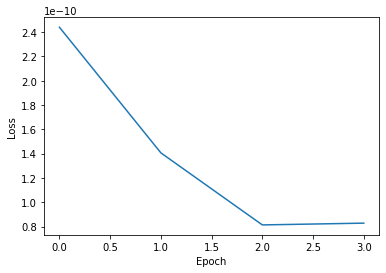

In [74]:
#Asignar etiqueta a X
plt.xlabel("Epoch")
#Asignar etiqueta a Y
plt.ylabel("Loss")
#Graficar
plt.plot(perdida)

# **Predicción**

In [75]:
y_hat = model.predict([150])
y_hat

array([[302.]], dtype=float32)